In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

Reading the matrix containing all the 13 features; the columns follow the same order from the EXPREssO dataset

In [2]:
path1 = '/home/cristiano/Documentos/ESPREssO/matrix_X.txt'
path2 = '/home/cristiano/Documentos/ESPREssO/matrix_Y.txt'
matrix_X = np.loadtxt(path1, usecols=range(13))
matrix_Y = np.loadtxt(path2, usecols=range(4))

# We are going to build a X-features FIFM matrix, generated by NF (col0), NM (col1) and FoC (col5).
x_FIFM = matrix_X[:,[0,1,5]].copy()
y_FIFM = matrix_Y[:,[2]].copy()

Now we plot x_SIFM datas

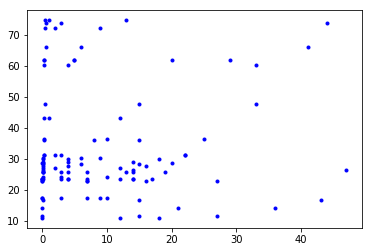

In [3]:
plt.plot(x_FIFM, y_FIFM, "b.")
plt.show()

Below we are goint to check about **correlation matrix** between the x_SIFM columns; the result os the matrix is between the [-1,1] range, where 1 means strong correlation, 0 no correlation and -1 opposite correlation.

In [4]:
#Below we are goint to check about correlation between the x_SIFM columns; the result os the matrix is between the [-1,1] range, where 1 means strong correlation, 0 no correlation and -1 opposite correlation.

a = x_FIFM[:,[0]].ravel()
b = x_FIFM[:,[1]].ravel()
c = x_FIFM[:,[2]].ravel()
np.corrcoef([a,b,c])

array([[ 1.        ,  0.53572198,  0.38478836],
       [ 0.53572198,  1.        , -0.18728638],
       [ 0.38478836, -0.18728638,  1.        ]])

# Spliting in TRAIN and TEST

## It gets only 30 first instances

In [5]:
# x_train, x_test, y_train, y_test = x_FIFM[:20], x_FIFM[20:30], y_FIFM[:20], y_FIFM[20:30]

## It gets ALL the 37 instances

In [6]:
x_train, x_test, y_train, y_test = x_FIFM[:27], x_FIFM[27:], y_FIFM[:27], y_FIFM[27:]

# LINEAR REGRESSION

Now we are goint to apply Linear Regression (closed Formula); <br>
documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
# below, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
lin_reg = LinearRegression(normalize=True, copy_X=True) # normalize x_SIFM array and won't affect original array
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [8]:
np.sqrt(mean_squared_error(y_test, lin_reg.predict(x_test)))

4.945282417847799

**Below, we compute the score R²:** <br>
The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares **((y_true - y_pred) ^ 2).sum()** and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [9]:
r2_score(y_test,lin_reg.predict(x_test)) # Returns the coefficient of determination R^2 of the prediction

0.8924672342189631

#####################################################################################################################

## Here, we are going to use Grid Search!

**For more info, please access the documentation:** http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

#####################################################################################################################

## Linear Regression Closed Formula REGULARIZED BY RIDGE <br>
**For more info, please access the documentation:**  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [10]:
param_grid = [{'alpha':[ 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]}] # Defining a set of values to check
ridge_reg = Ridge(solver="cholesky", normalize=True, copy_X=True, random_state=42)
grid_search = GridSearchCV(ridge_reg, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())
grid_search.best_params_

{'alpha': 0.2}

In [11]:
grid_search.best_estimator_

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=42, solver='cholesky', tol=0.001)

### to execute this feature, turn from MARKDOWN to CODE 
cvres = grid_search.cv_results_
for mean_score, params, rank_test_score in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(np.sqrt(-mean_score), params, rank_test_score)

In [56]:
Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=42, solver='cholesky', tol=0.001)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=42, solver='cholesky', tol=0.001)

In [13]:
r2_score(y_test, ridge_reg.predict(x_test))

0.8266113637508453

In [14]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test, ridge_reg.predict(x_test)))

6.279585903358177

#####################################################################################################################

## Linear Regression Closed Formula REGULARIZED BY LASSO <br>
**For more info, please access the documentation:**  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [15]:
param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]}] # Defining a set of values to check
lasso_reg = Lasso(normalize=True, copy_X=True, random_state=42)
grid_search = GridSearchCV(lasso_reg, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())
grid_search.best_params_

{'alpha': 0.3}

In [16]:
grid_search.best_estimator_

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

### to execute this feature, turn from MARKDOWN to CODE 
cvres = grid_search.cv_results_
for mean_score, params, rank_test_score in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(np.sqrt(-mean_score), params, rank_test_score)

In [17]:
Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso_reg.fit(x_train, y_train.ravel())
r2_score(y_test, lasso_reg.predict(x_test))

0.9215928883530432

In [18]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, lasso_reg.predict(x_test)))

4.222779633812653

#####################################################################################################################

## Lasso Regularization on Stochastic Gradient Descent REGRESSOR version <br>
**For more info, please access the documentation:** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [19]:
param_grid = [{'alpha':[0.0001, 0, 0.5, 1, 1.5], 'max_iter':[50,100,150,200], 'eta0':[1, 0.1, 0.01, 0.001, 0.0001]}] # Defining a set of values to check
sgd_reg = SGDRegressor(shuffle=True, penalty="l2", random_state=42)
grid_search = GridSearchCV(sgd_reg, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())
grid_search.best_params_

{'alpha': 1.5, 'eta0': 0.001, 'max_iter': 200}

### to execute this feature, turn from MARKDOWN to CODE 
cvres = grid_search.cv_results_
for mean_score, params, rank_test_score in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(np.sqrt(-mean_score), params, rank_test_score)

In [20]:
# trying the best parameters

In [21]:
sgd_reg = SGDRegressor(alpha=1.5, max_iter=200, eta0=0.001, shuffle=True, penalty="l2", random_state=42)
sgd_reg.fit(x_train, y_train.ravel())
r2_score(y_test, sgd_reg.predict(x_test)) # Returns the coefficient of determination R^2 of the prediction

0.6474335940909878

In [22]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, sgd_reg.predict(x_test)))

8.954496163065599

# LEARNING CURVES 

Defining the function

In [23]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Now we analize linear regression


Text(0.5,0,'Training set size')

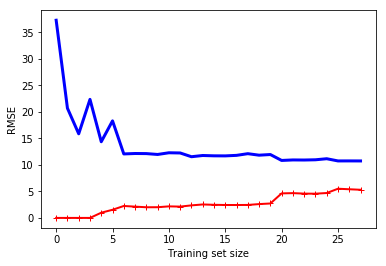

In [24]:
lin_reg = LinearRegression(normalize=True, copy_X=True)
plot_learning_curves(lin_reg, x_FIFM, y_FIFM) #red is training and blue is validation
plt.ylabel('RMSE')
plt.xlabel('Training set size')

## Now we analize polinomial regression <br>
**For more info, please access the documentation:** http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


In [25]:
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=8, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

Text(0.5,0,'Training set size')

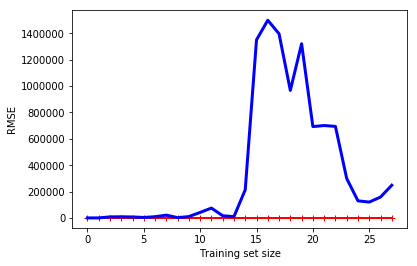

In [26]:
plot_learning_curves(polynomial_regression, x_FIFM, y_FIFM)
plt.ylabel('RMSE')
plt.xlabel('Training set size')

**Now we analize SGD regression**

Text(0.5,0,'Training set size')

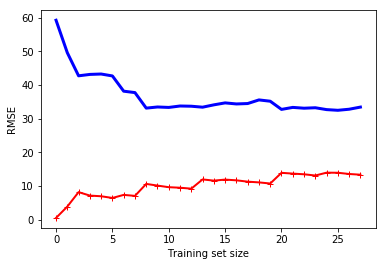

In [27]:
sgd_reg = SGDRegressor(alpha=1.5, max_iter=100, eta0=0.001, shuffle=True, penalty="l2", random_state=42)
plot_learning_curves(sgd_reg, x_FIFM, y_FIFM.ravel())
plt.ylabel('RMSE')
plt.xlabel('Training set size')

# SUPPORT VECTOR MACHINE <br>
**For more info, please access the documentation:** http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html

## Firstly, we are going to test SVR Linear, without Grid Search:

In [28]:
svm_reg = LinearSVR(random_state=42)
svm_reg.fit(x_train, y_train)

/home/cristiano/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [29]:
r2_score(y_test, svm_reg.predict(x_test))

0.7748653729537156

In [30]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, svm_reg.predict(x_test)))

7.155530530996331

**NOW, WITH GRID SEARCH**

In [31]:
param_grid = [{'C':[0.1, 0.5, 1, 1.5], 'epsilon':[0.2, 0.5, 1, 1.5] }] # Defining a set of values to check
svm_reg = LinearSVR(random_state=42)
grid_search = GridSearchCV(svm_reg, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())
grid_search.best_params_

{'C': 1.5, 'epsilon': 1.5}

In [32]:
grid_search.best_estimator_

LinearSVR(C=1.5, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

### to execute this feature, turn from MARKDOWN to CODE 
cvres = grid_search.cv_results_
for mean_score, params, rank_test_score in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(np.sqrt(-mean_score), params, rank_test_score)

In [33]:
# with these parameters, we are going to test them:
svm_reg = LinearSVR(C=0.1, epsilon=1.5,random_state=42)
svm_reg.fit(x_train, y_train.ravel())
r2_score(y_test, svm_reg.predict(x_test))

0.6433754461803363

In [34]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, svm_reg.predict(x_test)))

9.00588322018971

## Now, the polinomial version

 ## DOCUMENTATION HERE:
 **For more info, please access the documentation:** http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

## Firstly, we are going to test SVR kernel polinomial, without Grid Search:

In [35]:
svm_poly_reg = SVR()
svm_poly_reg.fit(x_train, y_train)

/home/cristiano/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
svm_poly_reg.support_ # Indices of support vectors.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int32)

In [37]:
svm_poly_reg.dual_coef_ # Coefficients of the support vector in the decision function.

array([[-1.        ,  1.        , -1.        , -1.        , -1.        ,
         1.        ,  1.        ,  1.        ,  0.73102518,  1.        ,
         1.        ,  1.        , -1.        ,  1.        ,  1.        ,
        -1.        ,  1.        , -1.        , -1.        , -1.        ,
         1.        ,  0.21403317, -0.94505835, -1.        , -1.        ,
         1.        , -1.        ]])

In [38]:
r2_score(y_test, svm_poly_reg.predict(x_test))

-0.01715620468497847

In [39]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, svm_poly_reg.predict(x_test)))

15.209485277234263

**WITH GRID SEARCH**

In [40]:
param_grid = [{'C':[0.1, 0.5, 1, 1.5], 'epsilon':[0.2, 0.5, 1, 1.5], 'degree': [2, 3, 4, 5]  }] # Defining a set of values to check
svm_poly_reg = SVR()
grid_search = GridSearchCV(svm_poly_reg, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train.ravel())

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 0.5, 1, 1.5], 'epsilon': [0.2, 0.5, 1, 1.5], 'degree': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
grid_search.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### to execute this feature, turn from MARKDOWN to CODE 
cvres = grid_search.cv_results_
for mean_score, params, rank_test_score in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(np.sqrt(-mean_score), params, rank_test_score)

In [42]:
svm_poly_reg = SVR(C=1.5, degree=2, epsilon=1.5, kernel="poly")
svm_poly_reg.fit(x_train, y_train.ravel())
r2_score(y_test, svm_poly_reg.predict(x_test))

0.8529733172960584

In [43]:
svm_poly_reg.dual_coef_ # Coefficients of the support vector in the decision function.

array([[ 1.5       , -1.5       ,  1.07698163,  1.5       , -1.384964  ,
        -1.5       ,  1.5       , -0.34745431, -1.5       , -1.5       ,
         1.5       ,  1.5       , -0.02558992, -0.91543657,  1.5       ,
        -1.40353684,  1.5       , -1.5       ]])

In [44]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, svm_poly_reg.predict(x_test)))

5.7825416527980105

# Plot charts 

http://scikit-learn.org/stable/auto_examples/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-plot-kernel-ridge-regression-py

http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

# Decision Tree Regression <br>
 **For more info, please access the documentation:** http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


In [45]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [46]:
# The feature importances. 
# The higher, the more important the feature. 
# The importance of a feature is computed as the (normalized) total reduction of the 
# criterion brought by that feature. It is also known as the Gini importance
tree_reg.feature_importances_

array([0.00176907, 0.10774853, 0.89048239])

In [47]:
tree_reg.max_features_ # The inferred value of max_features.

3

In [48]:
tree_reg.n_features_ # The number of features when fit is performed.

3

In [49]:
tree_reg.n_outputs_ # The number of outputs when fit is performed.

1

In [50]:
r2_score(y_test,tree_reg.predict(x_test))

0.8406902719199187

In [51]:
# MEAN SQUARED ERROR
np.sqrt(mean_squared_error(y_test, tree_reg.predict(x_test)))

6.019242477255756

# Outliers detection

Text(0.5,1,'FIFM BLOXPLOT OUTLIER DETECTION')

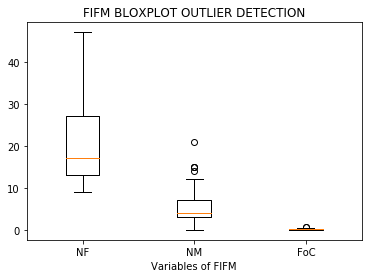

In [52]:
plt.boxplot(x_FIFM)
plt.labels = ('NF', 'NM', 'FoC')
plt.xticks(range(1,4),plt.labels, rotation=0)
plt.xlabel('Variables of FIFM')
plt.title('FIFM BLOXPLOT OUTLIER DETECTION')

Text(0.5,0,'NF')

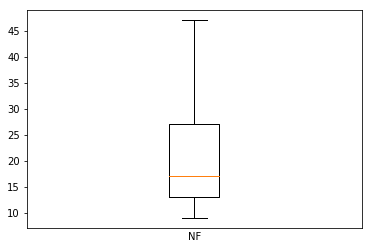

In [57]:
plt.boxplot(x_FIFM[:,0])
plt.labels = ('NF')
plt.xticks(range(1),plt.labels, rotation=0)
plt.xlabel('NF')

Text(0.5,0,'NM')

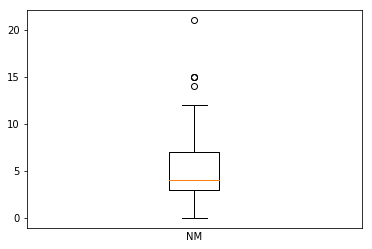

In [58]:
plt.boxplot(x_FIFM[:,1])
plt.labels = ('NM')
plt.xticks(range(1),plt.labels, rotation=0)
plt.xlabel('NM')

Text(0.5,0,'FoC')

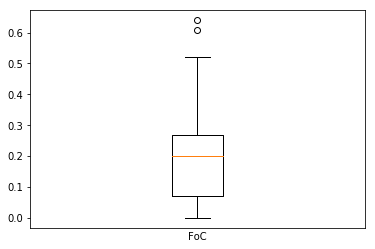

In [59]:
plt.boxplot(x_FIFM[:,2])
plt.labels = ('FoC')
plt.xticks(range(1),plt.labels, rotation=0)
plt.xlabel('FoC')